In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib_venn import venn2, venn3
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
from matplotlib.patches import Circle
import matplotlib.patches as patches

## Plot Over representation analysis

In [2]:
def plot_enrichment_analysis(file_path, top_n=20, figsize=(10, 6), showSignificant=True):
    """
    Plot the top N enriched terms from an enrichment analysis file.

    Parameters:
    - file_path: str, path to the enrichment analysis file.
    - top_n: int, number of top enriched terms to plot.
    - figsize: tuple, size of the figure.
    - showSignificant: bool, use color scale to indicate significance.
    """
    df = pd.read_csv(file_path, sep='\t')
    df = df.sort_values(by='Count', ascending=True).head(top_n)
    plt.figure(figsize=figsize)
    if showSignificant:
        # Create a color map based on -log10(p-value)
        df['neg_log_pvalue'] = -np.log10(df['PValue'])
        norm = plt.Normalize(df['neg_log_pvalue'].min(), df['neg_log_pvalue'].max())
        colors = plt.cm.viridis(norm(df['neg_log_pvalue']))
        # for y axis only keep the information about the term after the '~'""
        df['Term'] = df['Term'].str.split('~').str[1]
        sns.barplot(x='Count', y='Term', data=df, palette=colors)
    else:
        sns.barplot(x='Count', y='Term', data=df, palette='viridis')
    # show the scale bar
    if showSignificant:
        sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
        sm.set_array([])
        plt.colorbar(sm, label='-log10(p-value)')
    plt.title('Top Enriched Terms')
    plt.xlabel('Count')
    plt.ylabel('GO Term')
    plt.show()

/tmp/5686122/ipykernel_1089087/1247955827.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Term', data=df, palette=colors)
/tmp/5686122/ipykernel_1089087/1247955827.py:21: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(x='Count', y='Term', data=df, palette=colors)
/tmp/5686122/ipykernel_1089087/1247955827.py:28: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='-log10(p-value)')


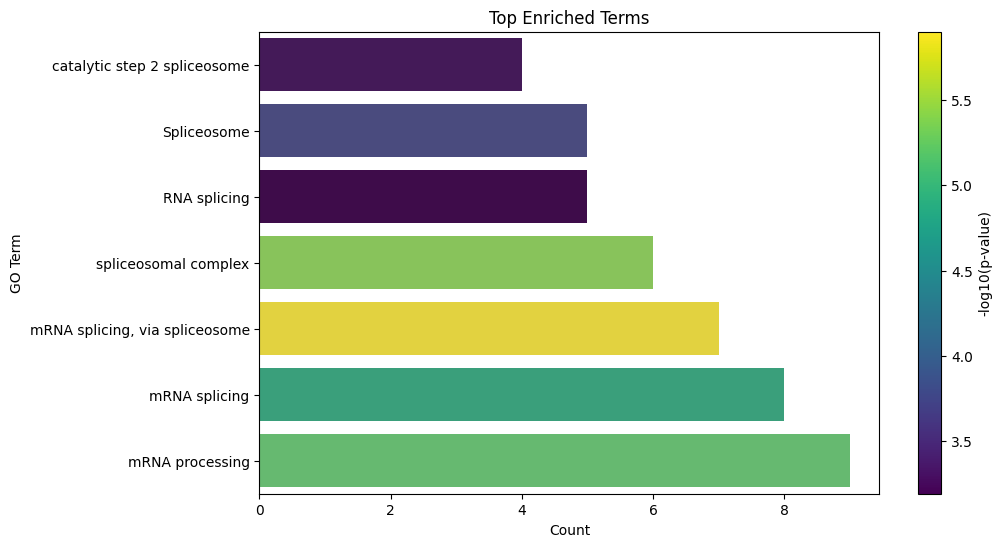

In [5]:
plot_enrichment_analysis(file_path="/home/jiguo/data/data/DAVID/Cluster1.tsv")

## Plot Venn Graph 

=== Detailed Gene Analysis ===

CENTROSOME GROUP:
  Centriolar satellite: 6 genes
  Centrosome: 27 genes
  Aggresome: 1 genes
    Genes: ['PRPF40B']
  Total unique genes in centrosome: 34

CELLDIVISION GROUP:
  Midbody ring: 1 genes
    Genes: ['CELF2']
  Midbody: 2 genes
    Genes: ['MED9', 'NAT10']
  Mitotic spindle: 3 genes
    Genes: ['ADRB2', 'INTS15', 'SKIC2']
  Total unique genes in celldivision: 6

CENTROSOME-DERIVED GROUP:
  Basal body: 20 genes
  Primary cilium tip: 4 genes
    Genes: ['CREB3', 'MAPK3', 'NR1H4', 'SMAD4']
  Primary cilium transition zone: 5 genes
    Genes: ['ATG5', 'BMP2', 'CREB3', 'SMAD2', 'SMAD3']
  Primary cilium: 15 genes
  Flagellar centriole: 5 genes
    Genes: ['HSPA1A', 'HSPA1B', 'HSPA8', 'PPP1CA', 'RBM5']
  Total unique genes in centrosome-derived: 36

Creating comprehensive gene localization plot...


/tmp/5686122/ipykernel_1089087/3523385631.py:74: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


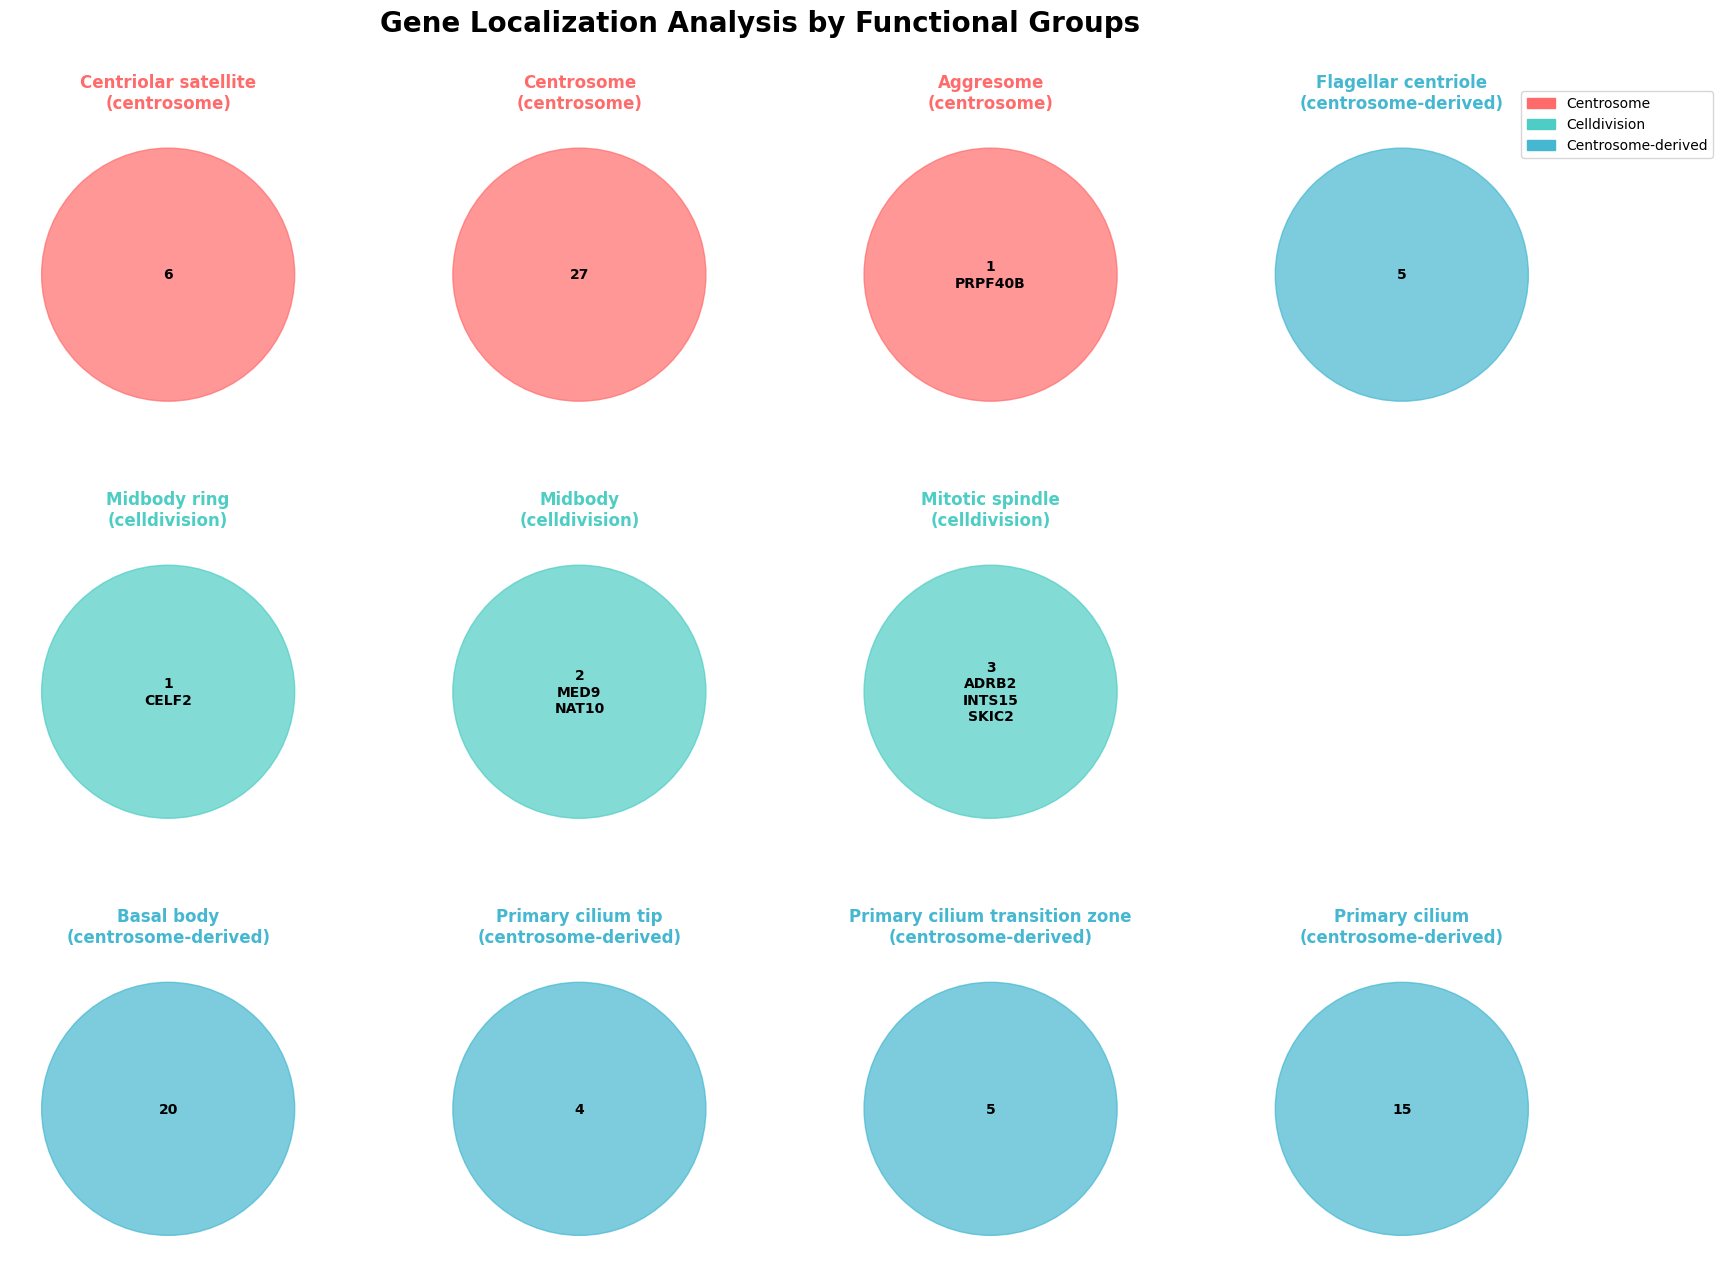

Creating group comparison Venn diagram...


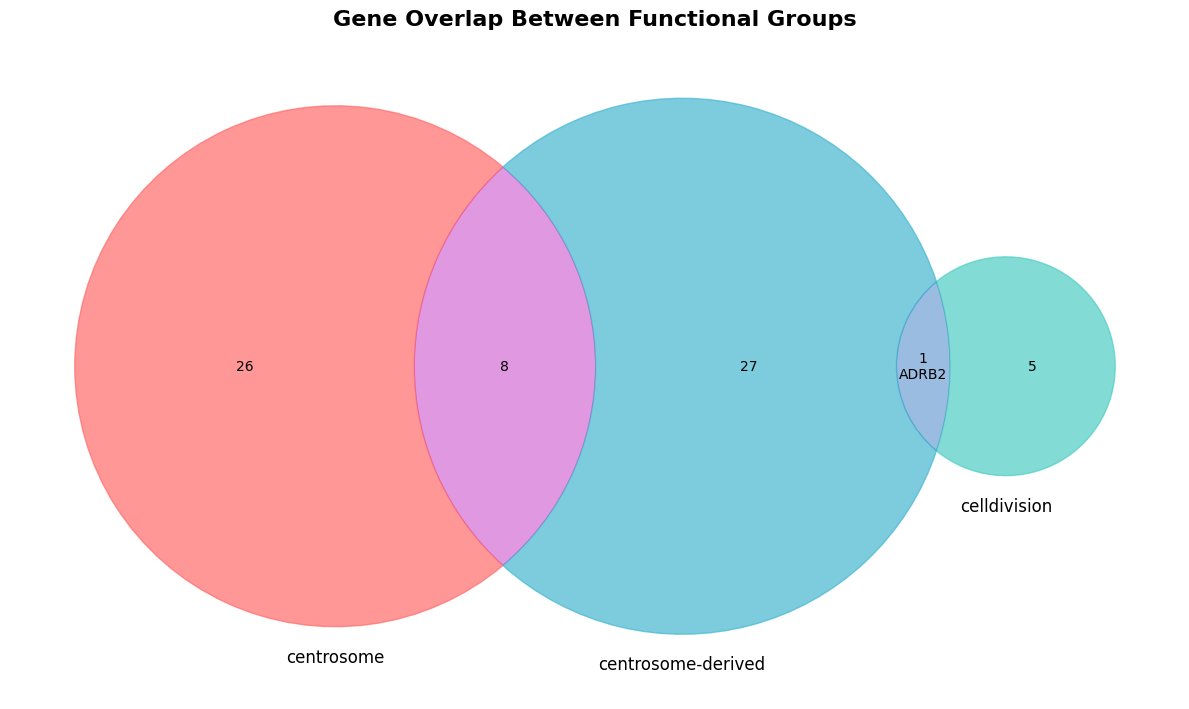

Genes in the intersection of all three groups: 0
No genes in the intersection of all three groups.


In [8]:
def read_gene_list(file_path):
    """Read a single TSV file and extract gene list"""
    df = pd.read_csv(file_path, sep='\t')
    genes = set(df['Gene name'].dropna().tolist())
    return genes
def read_grouped_gene_lists(tsv_files_dict):
    """Read all gene lists organized by groups"""
    grouped_gene_lists = {}
    for group_name, file_list in tsv_files_dict.items():
        grouped_gene_lists[group_name] = {}
        for file_path in file_list:
            # Extract location name from file path
            location_name = file_path.split('/')[-1].replace('_localization_results.tsv', '')
            genes = read_gene_list(file_path)
            grouped_gene_lists[group_name][location_name] = genes
    return grouped_gene_lists
def create_comprehensive_venn_plot(grouped_gene_lists):
    """Create a comprehensive plot showing all gene lists with group colors"""
    # Define colors for each group
    group_colors = {
        'centrosome': '#FF6B6B',      # Red tones
        'celldivision': '#4ECDC4',    # Teal tones  
        'centrosome-derived': '#45B7D1'     # Blue tones
    }
    # Create figure with subplots
    fig = plt.figure(figsize=(20, 15))
    # Create a grid layout
    gs = fig.add_gridspec(3, 4, hspace=0.3, wspace=0.3)
    subplot_positions = [
        (0, 0), (0, 1), (0, 2),  # Top row - centrosome group
        (1, 0), (1, 1), (1, 2),  # Middle row - celldivision group  
        (2, 0), (2, 1), (2, 2), (2, 3), (0, 3)  # Bottom row + extra - ciliagenesis group
    ]
    all_gene_sets = []
    all_labels = []
    all_colors = []
    subplot_idx = 0
    for group_name, locations in grouped_gene_lists.items():
        group_color = group_colors[group_name]
        for location_name, genes in locations.items():
            if subplot_idx < len(subplot_positions):
                row, col = subplot_positions[subplot_idx]
                ax = fig.add_subplot(gs[row, col])   
                # Create a simple circle to represent the gene set
                circle = Circle((0.5, 0.5), 0.4, color=group_color, alpha=0.7)
                ax.add_patch(circle)
                # Add text showing count and some gene names
                gene_count = len(genes)
                if gene_count <= 3 and gene_count > 0:
                    text_content = f"{gene_count}\n" + "\n".join(sorted(genes))
                else:
                    text_content = str(gene_count)
                ax.text(0.5, 0.5, text_content, ha='center', va='center', 
                       fontsize=10, fontweight='bold', wrap=True)
                # Set title
                ax.set_title(f"{location_name}\n({group_name})", 
                           fontsize=12, fontweight='bold', color=group_color)
                ax.set_xlim(0, 1)
                ax.set_ylim(0, 1)
                ax.set_aspect('equal')
                ax.axis('off')
                # Store for overall analysis
                all_gene_sets.append(genes)
                all_labels.append(f"{location_name}")
                all_colors.append(group_color)
                subplot_idx += 1
    # Add overall statistics in the remaining space
    fig.suptitle('Gene Localization Analysis by Functional Groups', 
                fontsize=20, fontweight='bold', y=0.95)
    # Add legend
    legend_elements = [patches.Patch(color=color, label=group.capitalize()) 
                      for group, color in group_colors.items()]
    fig.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(0.98, 0.9))
    plt.tight_layout()
    plt.show()
    return all_gene_sets, all_labels, all_colors
def create_group_comparison_venn(grouped_gene_lists):
    """Create Venn diagrams comparing the three main groups"""
    # Combine all genes in each group
    group_combined = {}
    for group_name, locations in grouped_gene_lists.items():
        combined_genes = set()
        for genes in locations.values():
            combined_genes.update(genes)
        group_combined[group_name] = combined_genes
    # Create 3-way Venn diagram for the groups
    fig, ax = plt.subplots(1, 1, figsize=(12, 10))
    group_names = list(group_combined.keys())
    group_sets = list(group_combined.values())
    # Define colors
    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
    venn = venn3(group_sets, set_labels=group_names, ax=ax)
    # Color the circles
    if venn.get_patch_by_id('100'):
        venn.get_patch_by_id('100').set_color(colors[0])
        venn.get_patch_by_id('100').set_alpha(0.7)
    if venn.get_patch_by_id('010'):
        venn.get_patch_by_id('010').set_color(colors[1])
        venn.get_patch_by_id('010').set_alpha(0.7)
    if venn.get_patch_by_id('001'):
        venn.get_patch_by_id('001').set_color(colors[2])
        venn.get_patch_by_id('001').set_alpha(0.7)
    
    # Calculate and display intersections with gene names
    intersections = {
        '110': group_sets[0] & group_sets[1] - group_sets[2],
        '101': group_sets[0] & group_sets[2] - group_sets[1],
        '011': group_sets[1] & group_sets[2] - group_sets[0],
        '111': group_sets[0] & group_sets[1] & group_sets[2],
        '100': group_sets[0] - group_sets[1] - group_sets[2],
        '010': group_sets[1] - group_sets[0] - group_sets[2],
        '001': group_sets[2] - group_sets[0] - group_sets[1]
    }
    for region_id, genes in intersections.items():
        label = venn.get_label_by_id(region_id)
        if label and genes:
            if len(genes) <= 3:
                label.set_text(f"{len(genes)}\n" + "\n".join(sorted(genes)))
            else:
                label.set_text(str(len(genes)))
        elif label:
            label.set_text("0")
    plt.title("Gene Overlap Between Functional Groups", fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()
def print_detailed_analysis(grouped_gene_lists):
    """Print detailed statistics"""
    print("=== Detailed Gene Analysis ===\n")
    
    for group_name, locations in grouped_gene_lists.items():
        print(f"{group_name.upper()} GROUP:")
        total_group_genes = set()
        
        for location_name, genes in locations.items():
            print(f"  {location_name}: {len(genes)} genes")
            if len(genes) <= 5 and genes:
                print(f"    Genes: {sorted(genes)}")
            total_group_genes.update(genes)
        
        print(f"  Total unique genes in {group_name}: {len(total_group_genes)}\n")
# Main execution
if __name__ == "__main__":
    # Define the file groups
    tsv_files_dict = {
        'centrosome': [
            '/home/jiguo/denovo_rpe1_scrnaseq/locations_of_genes/Centriolar satellite_localization_results.tsv',
            '/home/jiguo/denovo_rpe1_scrnaseq/locations_of_genes/Centrosome_localization_results.tsv',
            '/home/jiguo/denovo_rpe1_scrnaseq/locations_of_genes/Aggresome_localization_results.tsv'
        ],
        'celldivision': [
            '/home/jiguo/denovo_rpe1_scrnaseq/locations_of_genes/Midbody ring_localization_results.tsv',
            '/home/jiguo/denovo_rpe1_scrnaseq/locations_of_genes/Midbody_localization_results.tsv',
            '/home/jiguo/denovo_rpe1_scrnaseq/locations_of_genes/Mitotic spindle_localization_results.tsv'
        ],
        'centrosome-derived': [
            '/home/jiguo/denovo_rpe1_scrnaseq/locations_of_genes/Basal body_localization_results.tsv',
            '/home/jiguo/denovo_rpe1_scrnaseq/locations_of_genes/Primary cilium tip_localization_results.tsv',
            '/home/jiguo/denovo_rpe1_scrnaseq/locations_of_genes/Primary cilium transition zone_localization_results.tsv',
            '/home/jiguo/denovo_rpe1_scrnaseq/locations_of_genes/Primary cilium_localization_results.tsv',
            '/home/jiguo/denovo_rpe1_scrnaseq/locations_of_genes/Flagellar centriole_localization_results.tsv'
        ]
    }
    # Read all gene lists
    grouped_gene_lists = read_grouped_gene_lists(tsv_files_dict)
    # Print detailed analysis
    print_detailed_analysis(grouped_gene_lists)
    # Create comprehensive visualization
    print("Creating comprehensive gene localization plot...")
    create_comprehensive_venn_plot(grouped_gene_lists)
    # Create group comparison Venn diagram
    print("Creating group comparison Venn diagram...")
    create_group_comparison_venn(grouped_gene_lists)
    # print the gene in the intersection of the three groups
    intersection_genes = grouped_gene_lists['centrosome']['Centriolar satellite'].intersection(
        grouped_gene_lists['celldivision']['Midbody ring'],
        grouped_gene_lists['centrosome-derived']['Primary cilium tip']
    )
    print(f"Genes in the intersection of all three groups: {len(intersection_genes)}")
    if intersection_genes:
        print("Intersection Genes:", sorted(intersection_genes))
    else:
        print("No genes in the intersection of all three groups.")  

## plot location distributions

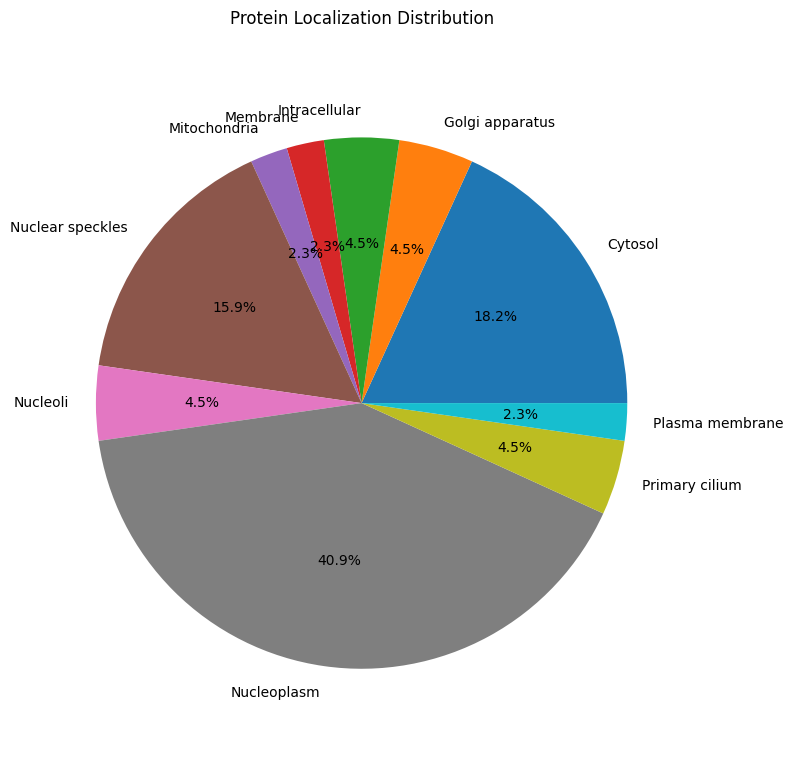

In [ ]:
df = pd.read_excel("/home/jiguo/Scripts/localization_of_26genes.xlsx")
localization_counts = df.drop(columns="Gene").apply(lambda col: col == "X").sum()
localization_counts = localization_counts[localization_counts > 0]  # Filter out localizations with zero counts


plt.figure(figsize=(8, 8))
plt.pie(localization_counts, labels=localization_counts.index, autopct='%1.1f%%')
plt.title("Protein Localization Distribution")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()


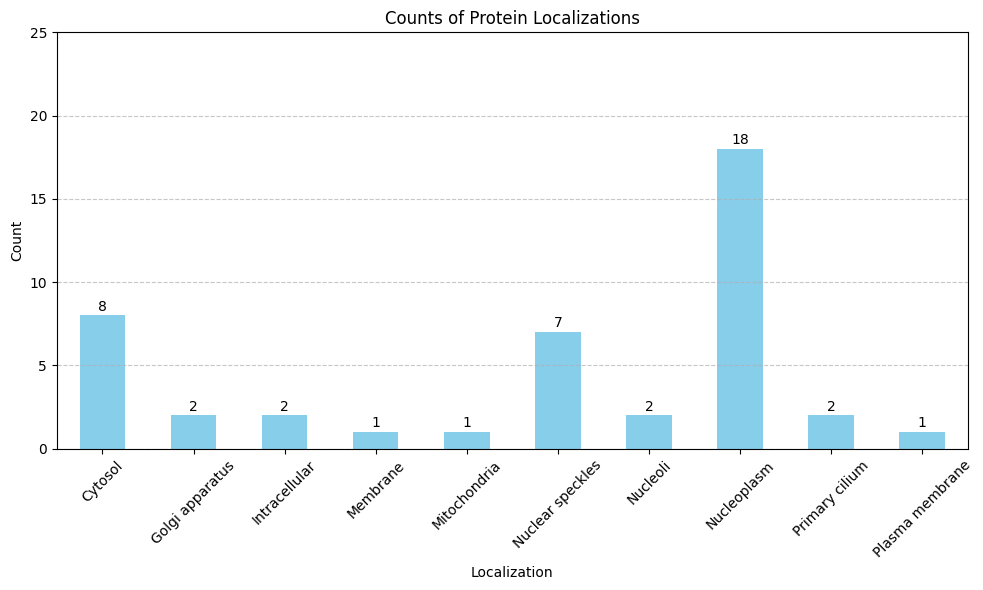

In [4]:
# plot a bar graph and show the counts of each localization on the bar
plt.figure(figsize=(10, 6))
localization_counts.plot(kind='bar', color='skyblue')
plt.title("Counts of Protein Localizations")
plt.ylim(0, localization_counts.max() + 7)  # Set y-axis limit to be slightly above the max count
plt.xlabel("Localization")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
# show the value of each bar on top of the bar
for index, value in enumerate(localization_counts):
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()